Dataset shape: (20, 3)
                              Product  \
0  Credit reporting, repair, or other   
1                     Debt collection   
2                       Consumer Loan   
3                            Mortgage   
4  Credit reporting, repair, or other   

                        Consumer complaint narrative  label  
0      Credit report contains incorrect information.      0  
1  Debt collector called repeatedly and harassed me.      1  
2  Unable to get a consumer loan approved despite...      2  
3              Bank overcharged my mortgage payment.      3  
4  My credit score dropped unexpectedly due to re...      0  

Class distribution:
 Product
Credit reporting, repair, or other    5
Debt collection                       5
Consumer Loan                         5
Mortgage                              5
Name: count, dtype: int64


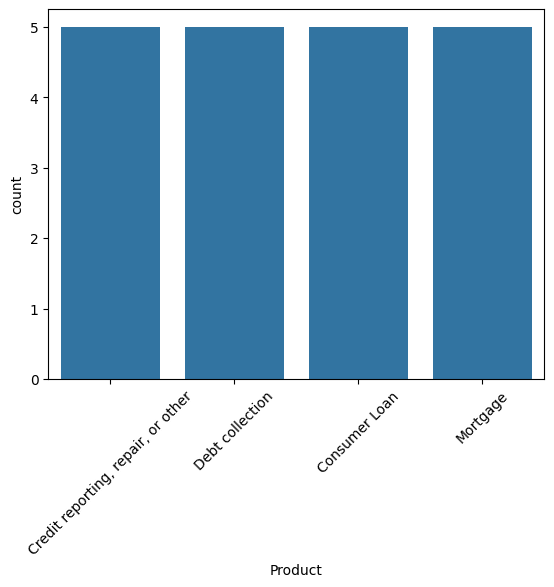


Logistic Regression Classification Report:

                                    precision    recall  f1-score   support

Credit reporting, repair, or other       1.00      1.00      1.00         1
                   Debt collection       1.00      1.00      1.00         1
                     Consumer Loan       1.00      1.00      1.00         1
                          Mortgage       1.00      1.00      1.00         1

                          accuracy                           1.00         4
                         macro avg       1.00      1.00      1.00         4
                      weighted avg       1.00      1.00      1.00         4


Naive Bayes Classification Report:

                                    precision    recall  f1-score   support

Credit reporting, repair, or other       1.00      1.00      1.00         1
                   Debt collection       1.00      1.00      1.00         1
                     Consumer Loan       1.00      1.00      1.00         1
  

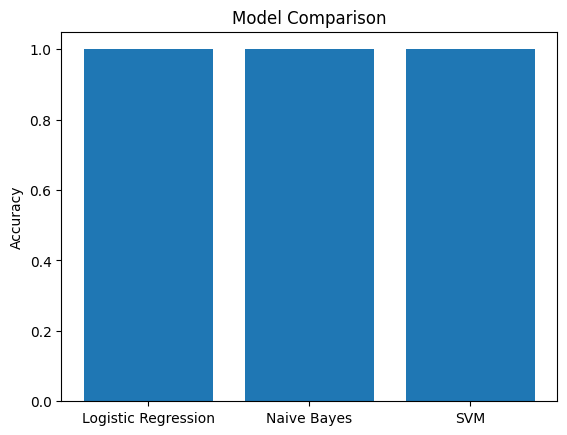

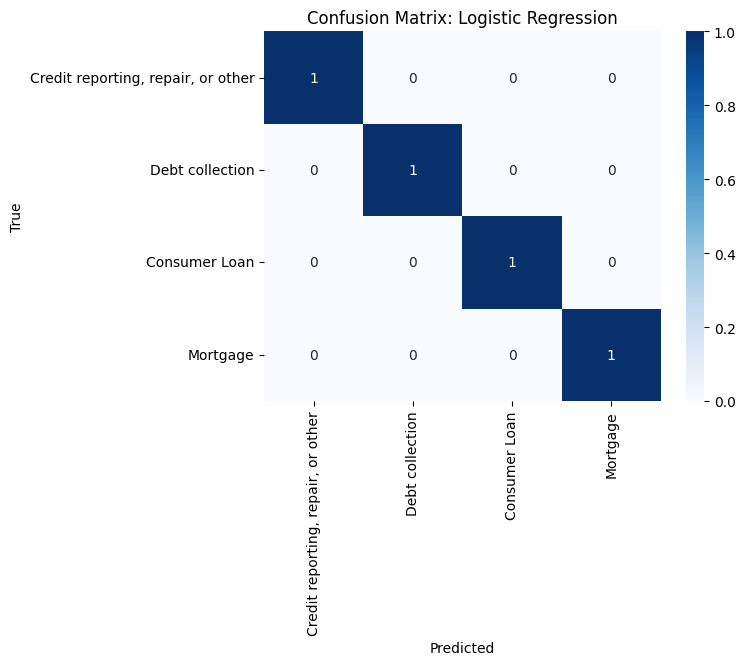

Sample Prediction: Debt collection


In [2]:
# 1. Import Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# 2. Load Filtered CSV
df = pd.read_csv("consumer_complaints_filtered.csv")  # path to your downloaded file
print("Dataset shape:", df.shape)
print(df.head())

# 3. Exploratory Data Analysis
print("\nClass distribution:\n", df['Product'].value_counts())
sns.countplot(x='Product', data=df)
plt.xticks(rotation=45)
plt.show()

# 4. Text Preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# 6. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 7. Model Training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=df['Product'].unique()))

# 8. Model Comparison
print("\nModel Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

# 9. Confusion Matrix for Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['Product'].unique(),
            yticklabels=df['Product'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()

# 10. Predict on New Complaint
sample_text = ["Debt collector keeps calling me late at night."]
sample_vec = vectorizer.transform([clean_text(sample_text[0])])
pred = best_model.predict(sample_vec)

# reverse mapping
reverse_mapping = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

print("Sample Prediction:", reverse_mapping[pred[0]])
